# KNN algorithm

* 거리가 가까운 k개의 기존 데이터 레이블을 참조, 가장 많이 속한 라벨로 입력된 데이터를 라벨링하는 방법
* 거리기반 분류분석 모델로 칭하기도 한다.
* euclidean 거리를 사용

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns0
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [7]:
x_train = [[0], [1], [2], [3]]
y_train = [0, 0, 1, 1]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(f"클래스의 종류 : {neigh.classes_}")
print(f"거리 계산 방법 : {neigh.effective_metric_}")
print(f"훈련 데이터 샘플 수 : {neigh.n_samples_fit_}")

클래스의 종류 : [0 1]
거리 계산 방법 : euclidean
훈련 데이터 샘플 수 : 4


## k의 수

* k-nn 알고리즘의 특징 중 하나는 탐색할 이웃의 개수에 따라 분류가 달라질 수 있다.
* k가 너무 크면 세세한 부분을 담지 못함 (과소적합)
* k가 너무 작으면 데이터 하나에 민감하게 반응 (과적합)

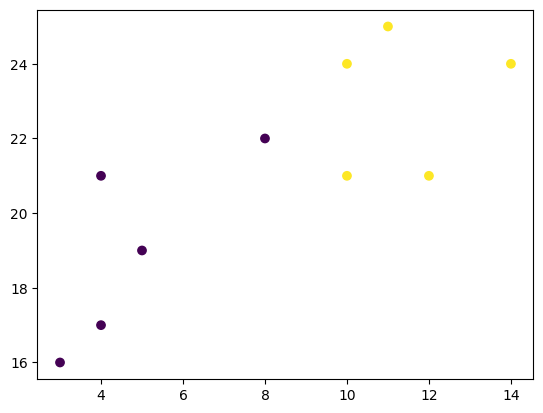

In [13]:
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

In [34]:
data = list(zip(x, y))
data

[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (8, 22),
 (10, 21),
 (12, 21)]

### k=1

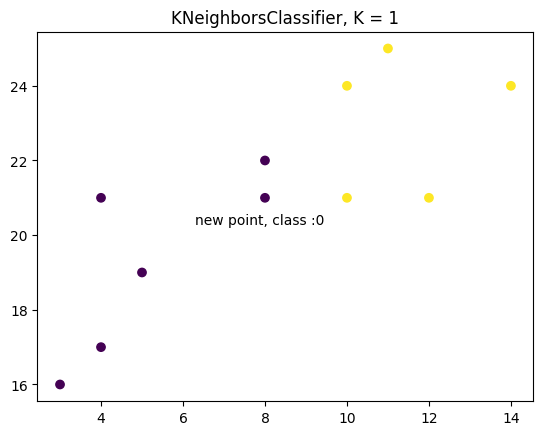

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c = classes+[prediction[0]])
plt.text(x = new_x-1.7, y=new_y-0.7, s = f"new point, class :{prediction[0]}")
plt.title("KNeighborsClassifier, K = 1")
plt.show()

### k = 5

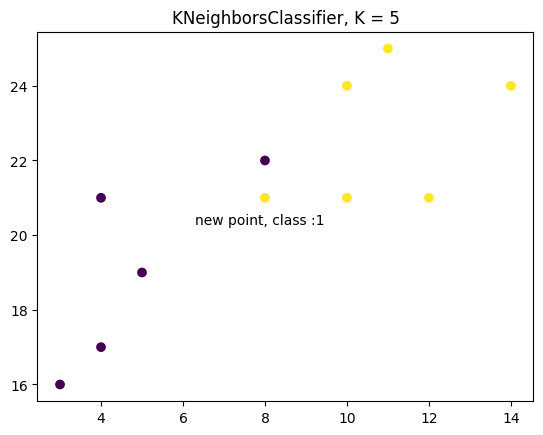

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
# new_x = 8
# new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c = classes+[prediction[0]])
plt.text(x = new_x-1.7, y=new_y-0.7, s = f"new point, class :{prediction[0]}")
plt.title("KNeighborsClassifier, K = 5")
plt.show()

* k가 1일때와 5일때의 분류되는 값이 다르다.
* 즉, k의 값이 어떻냐에 따라 값이 달라진다.

## 최적의 k 값을 찾는 방법

* cross_val_score 확인
* cv를 지정하지 않을 시, default 값은 5로 지정

In [67]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
scores = cross_val_score(knn, data, classes, cv=3, scoring = 'accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도 : {scores[i]}")

1번째 정확도 : 1.0
2번째 정확도 : 1.0
3번째 정확도 : 0.6666666666666666


# 표준화

## standard scaler

* 각 데이터가 평균에서 얼마나 떨어져 있는지 확인
* 컬럼의 특성 값의 평균을 0으로 하고, 표준편차를 1로 간주화하여 정규화

In [72]:
df = pd.DataFrame({"x1" : np.arange(11), "x2" : np.arange(11) ** 2})
df

,x1,x2
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [74]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

df_scaled = standardscaler.fit_transform(df)
pd.DataFrame(df_scaled, columns=["A_std", "B_std"])

,A_std,B_std
0,-1.581139,-1.066004
1,-1.264911,-1.035546
2,-0.948683,-0.944175
3,-0.632456,-0.791888
4,-0.316228,-0.578688
5,0.000000,-0.304572
6,0.316228,0.030457
7,0.632456,0.426401
8,0.948683,0.883260
9,1.264911,1.401033


## minmax scaler

* 각 특성의 최솟값과 최댓값을 기준으로 0~1 범위에서 값을 균등하게 지정

In [81]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

df_minmax = minmax.fit_transform(df)
pd.DataFrame(df_minmax, columns=["A_mms", "B_mms"])

,A_mms,B_mms
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81
